Text(0.3,0.3,'Ergodic n: 1000, Ergodic T: 10000 ')

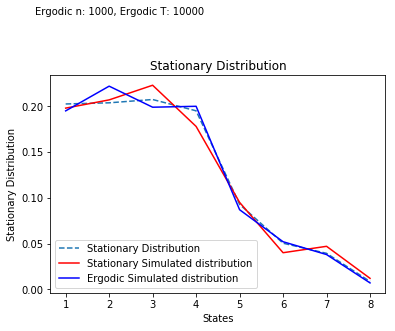

In [2]:
#solution 3
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt

P = [[0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
     [0.221, 0.220, 0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
     [0.207, 0.209, 0.210, 0.194, 0.090, 0.046, 0.036, 0.008],
     [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.040, 0.009],
     [0.175, 0.178, 0.197, 0.207, 0.110, 0.067, 0.054, 0.012],
     [0.182, 0.184, 0.200, 0.205, 0.106, 0.062, 0.050, 0.011],
     [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
     [0.084, 0.084, 0.142, 0.228, 0.170, 0.143, 0.121, 0.028]]

mc=qe.MarkovChain(P)
A=mc.stationary_distributions

states=np.arange(1,9)
plt.plot(states, A.T,'--', label="Stationary Distribution")
plt.xlabel('States')
plt.ylabel('Stationary Distribution')
plt.title('Stationary Distribution')
plt.legend()

A = mc.simulate(1000)
B=np.zeros(8)
for i in range(8):
    B[i]=np.mean(A==i)
states=np.arange(1,9)
plt.plot(states, B, 'r', label="Stationary Simulated distribution") 
plt.legend()

def ergodicity(n,T):
    mc=qe.MarkovChain(P)
    A=[None]*n
    for i in range(n):
        path=mc.simulate(T)
        A[i]=path
    return A

def dist_ergodic(x,T):
    B=np.empty(len(x))
    for i in range(len(x)):
        B[i]=x[i][T-1]
    return B
        
states=np.linspace(1,8,8)   
Q=ergodicity(1000,10000)
R=dist_ergodic(Q,10000)

S=np.zeros(8)
for i in range(8):
    S[i]=np.mean(R==i)
plt.plot(states, S, 'b', label="Ergodic Simulated distribution") 
plt.legend()
plt.text(0.3,0.3,'Ergodic n: 1000, Ergodic T: 10000 ')
